In [1]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "/content/drive/MyDrive/team_project1/data/Multi_to_share/"

In [3]:
X_train_before = pd.read_csv(path + 'X_basic_train.csv')
X_test = pd.read_csv(path + 'X_basic_test.csv')
X_val_before = pd.read_csv(path + 'X_basic_val.csv')

y_train_before = pd.read_csv(path + 'y_basic_train.csv')
y_test = pd.read_csv(path + 'y_basic_test.csv')
y_val_before = pd.read_csv(path + 'y_basic_val.csv')

print(X_train_before.shape, X_test.shape, X_val_before.shape)
print(y_train_before.shape, y_test.shape, y_val_before.shape)

(1241, 27) (389, 27) (311, 27)
(1241, 1) (389, 1) (311, 1)


In [4]:
X_train = pd.concat([X_train_before, X_val_before])
y_train = pd.concat([y_train_before, y_val_before])

X_train.shape, y_train.shape

((1552, 27), (1552, 1))

## 타겟값 살펴보기

In [5]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()

In [6]:
print(f"타겟의 개수: {y_train.nunique()}")

타겟의 개수: 7


In [7]:
print(f"y_train 타겟 비율: \n{y_train.value_counts(normalize=True)}\n")
print(f"y_test 타겟 비율: \n{y_test.value_counts(normalize=True)}\n")

y_train 타겟 비율: 
Other_Faults    0.346649
Bumps           0.206830
K_Scatch        0.201675
Z_Scratch       0.097938
Pastry          0.081186
Stains          0.037371
Dirtiness       0.028351
Name: class, dtype: float64

y_test 타겟 비율: 
Other_Faults    0.347044
Bumps           0.208226
K_Scatch        0.200514
Z_Scratch       0.097686
Pastry          0.082262
Stains          0.035990
Dirtiness       0.028278
Name: class, dtype: float64



In [8]:
# le = LabelEncoder()
# y_train_encode = le.fit_transform(y_train)
# y_test_encode = le.transform(y_test)

In [9]:
# list(le.classes_)

## 성능 평가 함수 정의

In [10]:
def cf_maxtix(y_test, y_pred):
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

In [11]:
def get_clf_eval(y_test, y_pred):
  precision = precision_score(y_test, y_pred, average="macro")
  recall = recall_score(y_test, y_pred, average="macro")
  f1 = f1_score(y_test, y_pred, average="macro")
  print(f'정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1 Score: {f1:.4f}')

## 로지스틱 회귀

### 기본 모델 성능

In [ ]:
lr = LogisticRegression()

start = time.time()
lr.fit(X_train, y_train)
end = time.time()

print(f"모델 학습 시간: {end-start}")

모델 학습 시간: 0.09001779556274414


In [ ]:
y_pred = lr.predict(X_test)
pd.DataFrame(y_pred).value_counts()

Other_Faults    192
K_Scatch        105
Bumps            92
dtype: int64

In [ ]:
get_clf_eval(y_test, y_pred)

정밀도: 0.1942, 재현율: 0.2554, F1 Score: 0.2202


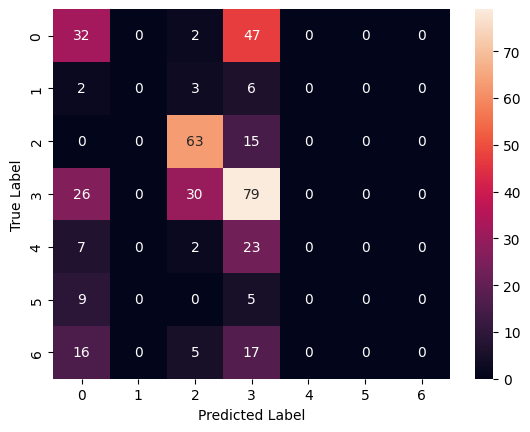

In [ ]:
cf_maxtix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.35      0.40      0.37        81
   Dirtiness       0.00      0.00      0.00        11
    K_Scatch       0.60      0.81      0.69        78
Other_Faults       0.41      0.59      0.48       135
      Pastry       0.00      0.00      0.00        32
      Stains       0.00      0.00      0.00        14
   Z_Scratch       0.00      0.00      0.00        38

    accuracy                           0.45       389
   macro avg       0.19      0.26      0.22       389
weighted avg       0.34      0.45      0.38       389



### 기본 모델 성능 + 라벨 인코딩
- 라벨 인코딩을 적용하면 성능이 달라질 것이다. (False)
  - 라벨 인코딩을 하기 전과 후의 성능에는 차이가 없다.

In [ ]:
# lr = LogisticRegression()

# start = time.time()
# lr.fit(X_train, y_train_encode)
# end = time.time()

# print(f"모델 학습 시간: {end-start}")

모델 학습 시간: 0.09797215461730957


In [ ]:
# y_pred = lr.predict(X_test)
# pd.DataFrame(y_pred).value_counts()

3    192
2    105
0     92
dtype: int64

In [ ]:
# get_clf_eval(y_test_encode, y_pred)

정밀도: 0.1942, 재현율: 0.2554, F1 Score: 0.2202


### StandardScaler
- 정규화를 진행하면 모델의 성능이 올라갈 것이다. (T)
  - 기존: 정밀도: 0.1942, 재현율: 0.2554, F1 Score: 0.2202
  - 정규화: 정밀도: 0.7618, 재현율: 0.7271, F1 Score: 0.7405

In [ ]:
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
lr = LogisticRegression()

start = time.time()
lr.fit(X_train_s, y_train)
end = time.time()

print(f"모델 학습 시간: {end-start}")

모델 학습 시간: 0.09124445915222168


In [ ]:
y_pred = lr.predict(X_test_s)
pd.DataFrame(y_pred).value_counts()

Other_Faults    151
K_Scatch         75
Bumps            67
Z_Scratch        40
Pastry           34
Stains           14
Dirtiness         8
dtype: int64

In [ ]:
get_clf_eval(y_test, y_pred)

정밀도: 0.7618, 재현율: 0.7271, F1 Score: 0.7405


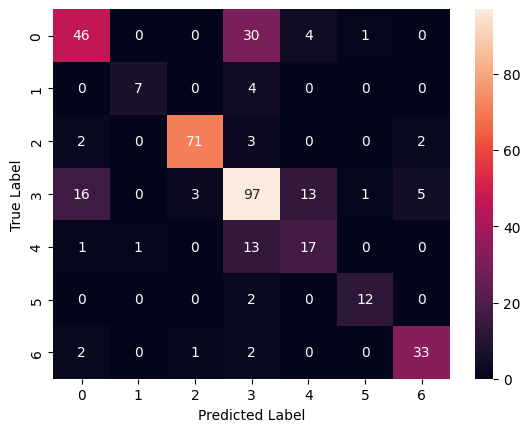

In [ ]:
cf_maxtix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.69      0.57      0.62        81
   Dirtiness       0.88      0.64      0.74        11
    K_Scatch       0.95      0.91      0.93        78
Other_Faults       0.64      0.72      0.68       135
      Pastry       0.50      0.53      0.52        32
      Stains       0.86      0.86      0.86        14
   Z_Scratch       0.82      0.87      0.85        38

    accuracy                           0.73       389
   macro avg       0.76      0.73      0.74       389
weighted avg       0.73      0.73      0.73       389



### MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
lr = LogisticRegression()

start = time.time()
lr.fit(X_train_s, y_train)
end = time.time()

print(f"모델 학습 시간: {end-start}")

모델 학습 시간: 0.19674396514892578


In [ ]:
y_pred = lr.predict(X_test_s)
pd.DataFrame(y_pred).value_counts()

Other_Faults    156
K_Scatch         77
Bumps            70
Z_Scratch        38
Pastry           28
Stains           16
Dirtiness         4
dtype: int64

In [ ]:
get_clf_eval(y_test, y_pred)

정밀도: 0.7687, 재현율: 0.6815, F1 Score: 0.7021


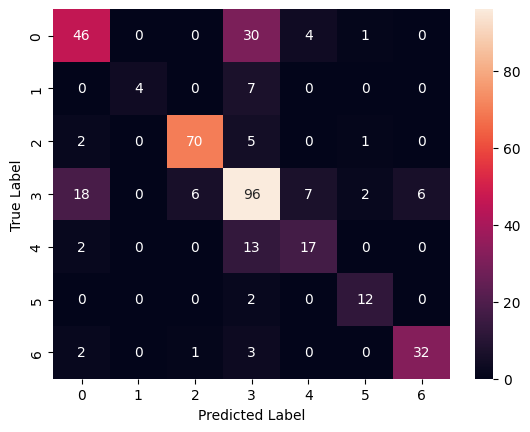

In [ ]:
cf_maxtix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.66      0.57      0.61        81
   Dirtiness       1.00      0.36      0.53        11
    K_Scatch       0.91      0.90      0.90        78
Other_Faults       0.62      0.71      0.66       135
      Pastry       0.61      0.53      0.57        32
      Stains       0.75      0.86      0.80        14
   Z_Scratch       0.84      0.84      0.84        38

    accuracy                           0.71       389
   macro avg       0.77      0.68      0.70       389
weighted avg       0.72      0.71      0.71       389



### class_weight='balanced'
- 해당 파라미터를 활용하면 성능이 올라갈 것이다.(False)

In [ ]:
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
lr = LogisticRegression(class_weight='balanced')

start = time.time()
lr.fit(X_train_s, y_train)
end = time.time()

print(f"모델 학습 시간: {end-start}")

모델 학습 시간: 0.07277202606201172


In [ ]:
y_pred = lr.predict(X_test_s)
pd.DataFrame(y_pred).value_counts()

Bumps           80
K_Scatch        80
Other_Faults    71
Pastry          59
Z_Scratch       52
Dirtiness       30
Stains          17
dtype: int64

In [ ]:
get_clf_eval(y_test, y_pred)

정밀도: 0.6105, 재현율: 0.7319, F1 Score: 0.6375


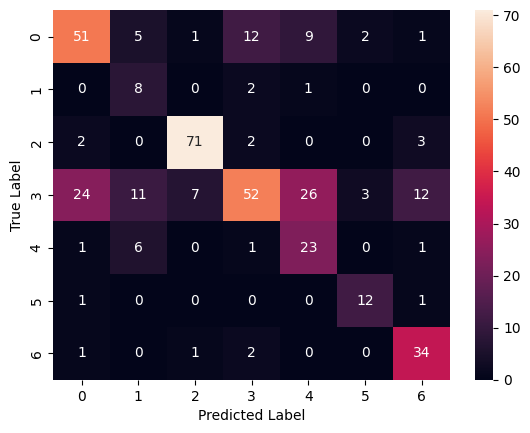

In [ ]:
cf_maxtix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.64      0.63      0.63        81
   Dirtiness       0.27      0.73      0.39        11
    K_Scatch       0.89      0.91      0.90        78
Other_Faults       0.73      0.39      0.50       135
      Pastry       0.39      0.72      0.51        32
      Stains       0.71      0.86      0.77        14
   Z_Scratch       0.65      0.89      0.76        38

    accuracy                           0.65       389
   macro avg       0.61      0.73      0.64       389
weighted avg       0.69      0.65      0.64       389



## 로지스틱 회귀

In [12]:
import os
n_cpu = os.cpu_count()
n_thread = n_cpu*2

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf=RandomForestClassifier ( )

In [15]:
parameters={'n_estimators': [50,100], 'criterion': ['entropy'], 'min_samples_split': [2,5], 'max_depth': [None,2], 'min_samples_leaf':[1, 3, 10], 'max_features': ['sqrt']}

GSRF=GridSearchCV(rf,parameters,cv=10,n_jobs=n_thread, scoring ="accuracy")

In [16]:
GSRF.fit (X_train, y_train)
print('final params', GSRF.best_params_) 
print('best score', GSRF.best_score_)

final params {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
best score 0.7776674937965261


In [17]:
y_pred = GSRF.predict(X_test)

In [18]:
get_clf_eval(y_test, y_pred)

정밀도: 0.8420, 재현율: 0.7588, F1 Score: 0.7946


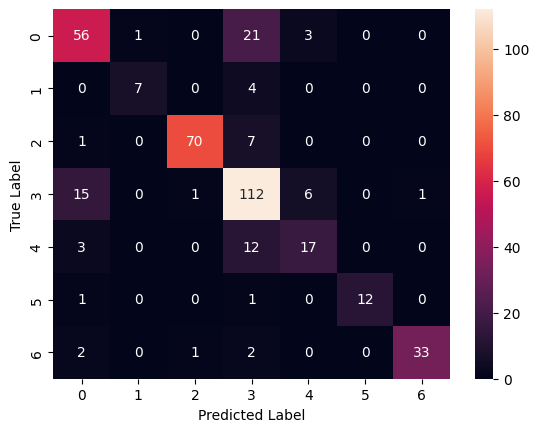

In [19]:
cf_maxtix(y_test, y_pred)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.72      0.69      0.70        81
   Dirtiness       0.88      0.64      0.74        11
    K_Scatch       0.97      0.90      0.93        78
Other_Faults       0.70      0.83      0.76       135
      Pastry       0.65      0.53      0.59        32
      Stains       1.00      0.86      0.92        14
   Z_Scratch       0.97      0.87      0.92        38

    accuracy                           0.79       389
   macro avg       0.84      0.76      0.79       389
weighted avg       0.80      0.79      0.79       389



In [21]:
y_pred = GSRF.best_estimator_.predict(X_test)

In [24]:
import pickle 
with open(path + 'multi_classification_ML.pickle','wb') as fw:
    pickle.dump(GSRF.best_estimator_, fw)